### `Dependencies`

In [1]:
import numpy as np
from helper import sz

### `2.1 Scalars, Vectors, Matrices, and Tensors`

In [2]:
scalar = np.array(5)
vector = np.array([1,2,3])
matrix = np.array([[4,5,6], [7,8,9]])
tensor = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

In [3]:
sz(scalar)
sz(vector)
sz(matrix)
sz(tensor)

shape: () dim: 0
shape: (3,) dim: 1
shape: (2, 3) dim: 2
shape: (2, 2, 2) dim: 3


### `2.2 Multiplying Matrices and Vectors`

In [4]:
m1 = np.array([[1,2,3], [4,5,6]])
m2 = np.array([[2,1,0], [4,3,2], [6,5,4]])

sz(m1)
sz(m2)

shape: (2, 3) dim: 2
shape: (3, 3) dim: 2


In [5]:
matrix_multiplication = np.dot(m1, m2)

print(matrix_multiplication)
sz(matrix_multiplication)

[[28 22 16]
 [64 49 34]]
shape: (2, 3) dim: 2


In [6]:
MV = np.dot(m2, vector)

print(MV)
sz(MV)

[ 4 16 28]
shape: (3,) dim: 1


### `2.3 Identity and Inverse Matrices`

In [7]:
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [8]:
A = np.random.rand(3, 3)
A_inv = np.linalg.inv(A)

AA_inv = np.dot(A, A_inv)
print(AA_inv)

# allclose checks if two numpy arrays are close enough within a tolerance
print(np.allclose(AA_inv, I))

[[ 1.00000000e+00  4.72015329e-17 -1.61811940e-16]
 [ 4.19671505e-17  1.00000000e+00 -1.14013123e-16]
 [ 1.82903393e-16  6.33846743e-17  1.00000000e+00]]
True


### `2.4 Linear Dependence and Span`

In [9]:
# Few conditions to find rank of a matrix
# 1. rank <= min(np.array().shape) i.e highest value that rank of an array assumes is its smallest dimension
# 2. dim of col of m1 = 2, i.e we are in 2D space, hence at max we could have 2 indpenendent cols. 
# 3. rank = number of independed rows. Since we've 2 independent rows ==> rank = 2
print(np.linalg.matrix_rank(m1))
print(np.linalg.matrix_rank(A))

2
3


### `2.5 Norms`

In [10]:
# Norm for matrices
print(m1,'\n')

# L2_norm: It measures the maximum "stretch" the matrix can apply to any vector. (obtained by SVD)
# L2 for vector is sqrt(sum of square of A_ij) 
print(f"L2_norm = {np.linalg.norm(m1, ord=2)}")
# Manhatten_dist: max of abs col sums i.e max(5, 7, 9)
print(f"Manhatten_dist = {np.linalg.norm(m1, ord=1)}")
# Frobenious: sqrt(sum of square of A_ij) 
print(f"Frobenious norm = {np.linalg.norm(m1, 'fro')}")
# Max norm: max of absolute row sums i.e max(6, 15)
print(f'Max norm = {np.linalg.norm(m1, ord=np.inf)}')

[[1 2 3]
 [4 5 6]] 

L2_norm = 9.508032000695723
Manhatten_dist = 9.0
Frobenious norm = 9.539392014169456
Max norm = 15.0


### `2.6 Special Kinds of Matrices and Vectors`

In [11]:
# creating a diagonal matrix with diagonal elements
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [12]:
# proving a property of symmetric matrix 

B = np.random.randint(0, 10, size=(3,3))
print(f'B: \n{B}')

S = B + B.T
print(f'S: \n{S}')

print(f'\nSymmetric? : {np.allclose(S, S.T)}')

B: 
[[4 8 7]
 [2 3 6]
 [5 7 9]]
S: 
[[ 8 10 12]
 [10  6 13]
 [12 13 18]]

Symmetric? : True


### `2.7 Eigendecomposition`

In [13]:
# using the above symmetric matrix to find its eigen value and vectors 

eval, evec = np.linalg.eig(S)

# verification Sv = λv
lhs = np.dot(S, evec[:,0])
rhs = eval[0] * evec[:,0] 

print(f'Sv == λv ? : {np.allclose(lhs, rhs)}')

# reconstructing S with evec and eval using S = evec * diag(eval) * evec^-1

s_reconstruct = evec @ np.diag(eval) @ np.linalg.inv(evec)
print(f'Are S, S_reconst equal? : {np.allclose(S, s_reconstruct)}')

Sv == λv ? : True
Are S, S_reconst equal? : True


### `2.8 Singular Value Decomposition (SVD)`

In [14]:
B = np.random.randint(0,10,(5, 3))

U, D, V_transpose = np.linalg.svd(B)
sz(U)
sz(D)
sz(V_transpose)

# reconstruct B 
Singular_matrix = np.zeros(B.shape)
Singular_matrix[:3, :3] = np.diag(D)

B_reconstruct = U @ Singular_matrix @ V_transpose

print(f'\nB == B_reconstruct? : {np.allclose(B, B_reconstruct)}')

# U: left-singlualr vectors(cols of U) are eigen vectors of BB.T
A = B @ B.T
evalue, evector = np.linalg.eig(A)

print(f'(BB.T)v == λv? : {np.allclose((A @ evector[:, 0]), (evalue[0] * evector[:, 0]))}')

shape: (5, 5) dim: 2
shape: (3,) dim: 1
shape: (3, 3) dim: 2

B == B_reconstruct? : True
(BB.T)v == λv? : True


### `2.9 The Moore-Penrose Pseudoinverse`

In [15]:
A = np.random.rand(3,3)
A_pinv = np.linalg.pinv(A)

A_reconstruct = A @ A_pinv @ A

print(f'A == A_reconstruct? : {np.allclose(A, A_reconstruct)}')

A == A_reconstruct? : True


### `2.10 The Trace Operator`

In [16]:
A = np.random.randint(0, 10, (3,3))
print(A)
print(f'\ntrace = {np.trace(A)}')
# verification 
print(f'Tr(A) == sum of diag(A)?: {np.trace(A) == sum(np.diag(A))}')

[[8 2 7]
 [9 9 2]
 [9 1 3]]

trace = 20
Tr(A) == sum of diag(A)?: True


### `2.11 The Determinant`

In [17]:
A_det = np.linalg.det(A)
print(A_det)

# A determinant of 0 tells you the matrix is singular and has no inverse.
# which also means one of the eigen values is zero

-322.00000000000006


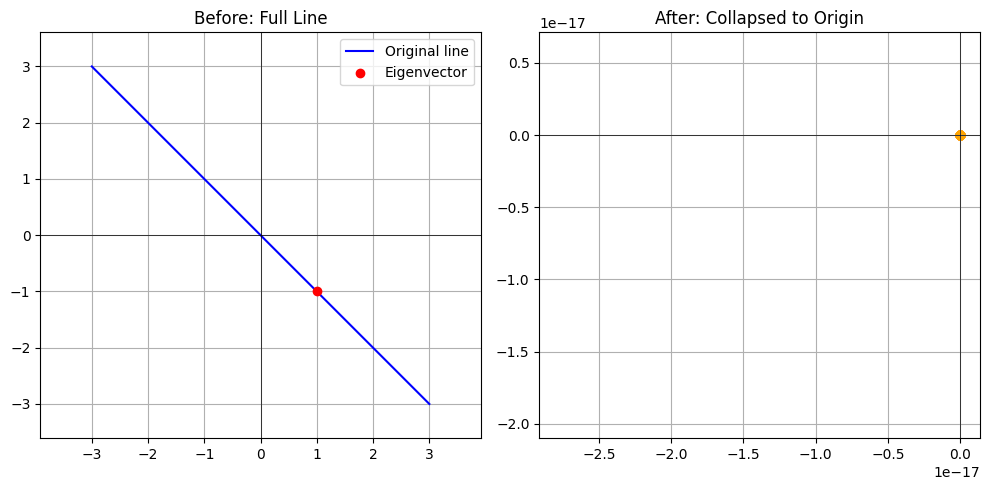

In [18]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1, 1], [0, 0]])
v = np.array([1, -1])

# Generate points on the line
t = np.linspace(-3, 3, 100)
line_points = np.outer(t, v)  # (100, 2)

# Apply A
transformed = line_points @ A.T  # or A @ line_points.T

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(line_points[:, 0], line_points[:, 1], 'b-', label='Original line')
plt.scatter([1], [-1], color='red', zorder=5, label='Eigenvector')
plt.axhline(0, color='k', lw=0.5); plt.axvline(0, color='k', lw=0.5)
plt.title("Before: Full Line")
plt.legend(); plt.grid(True); plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(transformed[:, 0], transformed[:, 1], c='orange')
plt.title("After: Collapsed to Origin")
plt.axhline(0, color='k', lw=0.5); plt.axvline(0, color='k', lw=0.5)
plt.grid(True); plt.axis('equal')

plt.tight_layout()
plt.show()

### `2.12 Example: Principal Components Analysis (PCA)`

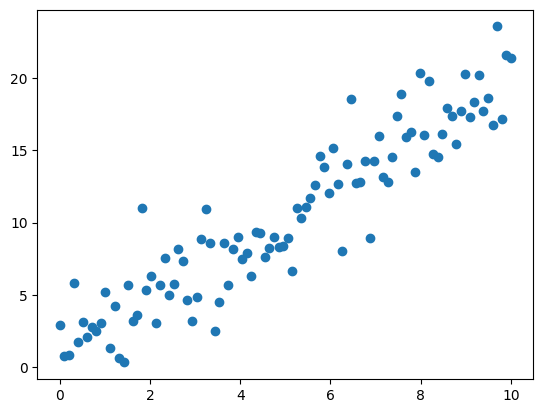

In [20]:
import matplotlib.pyplot as plt
# Create correlated data
x = np.linspace(0, 10, 100)
y = 2 * x + np.random.randn(100) * 2 # y is 2*x + some noise
data = np.stack([x, y], axis=1)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [22]:
data_centered = data - data.mean(axis=0)
cov_matrix = np.cov(data_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
print("My Eigenvectors:\n", eigenvectors)
print("Sklearn's Components:\n", pca.components_)

My Eigenvectors:
 [[-0.90345867 -0.4286752 ]
 [ 0.4286752  -0.90345867]]
Sklearn's Components:
 [[ 0.4286752   0.90345867]
 [ 0.90345867 -0.4286752 ]]
